In [2]:
import json
with open('gearnet_pretrained_pipeline.json', 'r') as f:
    data = json.load(f)

at 0, 0: {'micro_auroc': 0.898475170135498, 'mcc': 0.5253617025048173}
at 0, 1: {'micro_auroc': 0.8815299868583679, 'mcc': 0.49767491553081533}
at 0, 2: {'micro_auroc': 0.8995625376701355, 'mcc': 0.5056370283014985}
at 1, 0: {'micro_auroc': 0.8949525952339172, 'mcc': 0.525607256426821}
at 1, 1: {'micro_auroc': 0.8885302543640137, 'mcc': 0.532665546609887}
at 1, 2: {'micro_auroc': 0.8916500210762024, 'mcc': 0.49857843808576296}
at 2, 0: {'micro_auroc': 0.8918523192405701, 'mcc': 0.5213072218799152}
at 2, 1: {'micro_auroc': 0.8995115160942078, 'mcc': 0.5375581917753716}
at 2, 2: {'micro_auroc': 0.8897244334220886, 'mcc': 0.5312063457338376}
at 3, 0: {'micro_auroc': 0.8953359723091125, 'mcc': 0.502578467208421}
at 3, 1: {'micro_auroc': 0.8990063667297363, 'mcc': 0.4982151923921129}
at 3, 2: {'micro_auroc': 0.8955461978912354, 'mcc': 0.5019445578518771}
at 4, 0: {'micro_auroc': 0.8837110996246338, 'mcc': 0.4783800806004276}
at 4, 1: {'micro_auroc': 0.8842748999595642, 'mcc': 0.499527002019

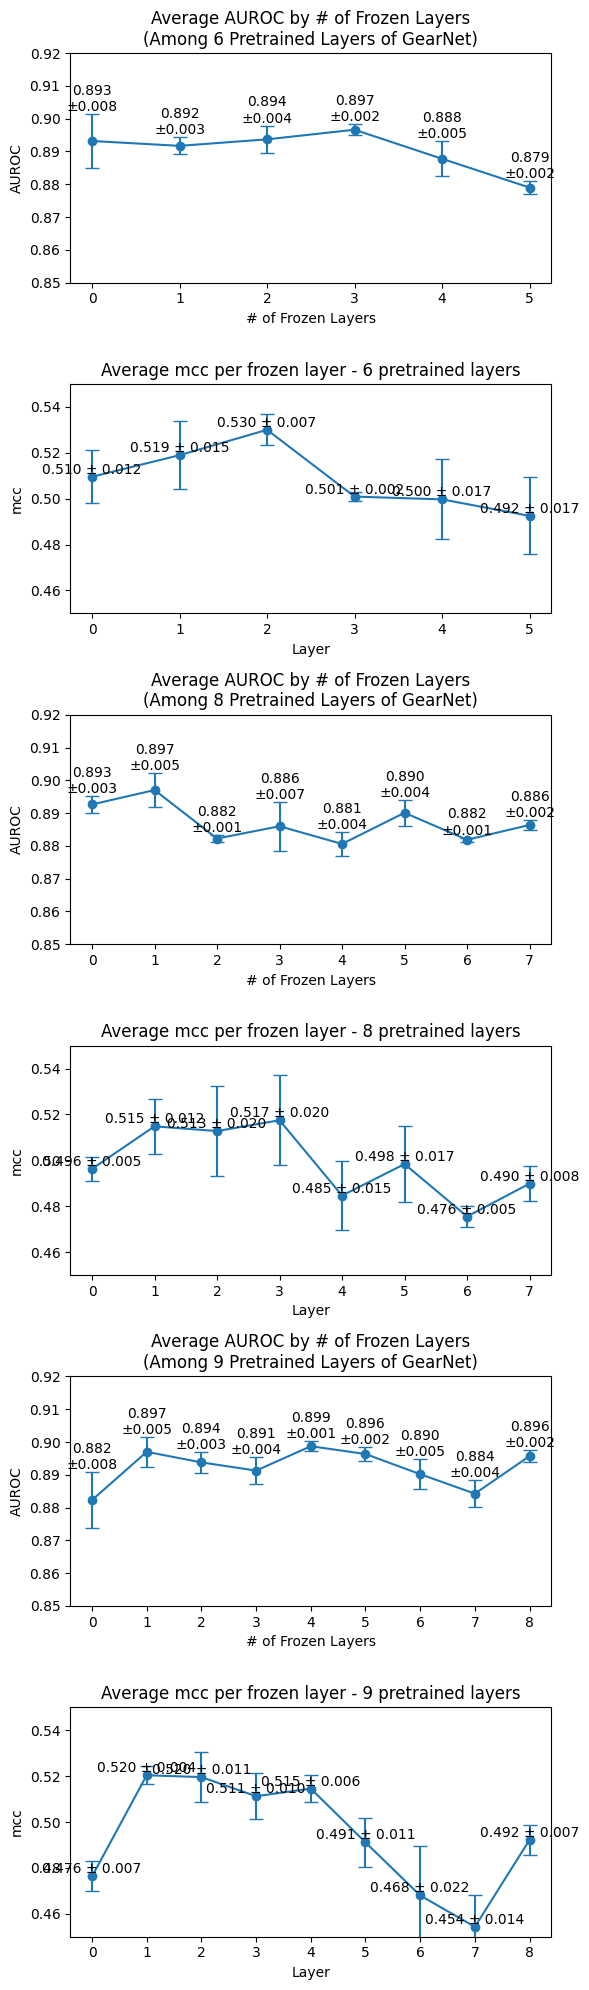

In [9]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

# Plotting
fig, axs = plt.subplots(6, figsize=(6,20))

for pretrained_index, pretrained_layers in enumerate([6, 8, 9]):
    layers = list(range(pretrained_layers))

    avg_metrics = {'micro_auroc': [], 'mcc': []}
    std_metrics = {'micro_auroc': [], 'mcc': []}

    for layer in range(pretrained_layers):
        layer_data = [d for d in data if d['layer'] == layer and d['pretrained_layers'] == pretrained_layers]
        
        metrics = {'micro_auroc': [], 'mcc': []}
        
        
        for trial in np.unique([d['trial'] for d in layer_data]):
            trial_data = [d for d in layer_data if d['trial'] == trial]
            last_epoch_metric = trial_data[-1]['data']
            print(f'at {layer}, {trial}: {last_epoch_metric}')
            
            metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
            metrics['mcc'].append(last_epoch_metric['mcc'])
        
        avg_metrics['micro_auroc'].append(np.mean(metrics['micro_auroc']))
        avg_metrics['mcc'].append(np.mean(metrics['mcc']))
        std_metrics['micro_auroc'].append(np.std(metrics['micro_auroc']))
        std_metrics['mcc'].append(np.std(metrics['mcc']))

    

    # micro_auroc plot
    axs1 = axs[pretrained_index*2]
    axs1.errorbar(layers, avg_metrics['micro_auroc'], yerr=std_metrics['micro_auroc'], fmt='-o', capsize=5)
    axs1.set_title(f'Average AUROC by # of Frozen Layers\n(Among {pretrained_layers} Pretrained Layers of GearNet)')
    axs1.set_xlabel('# of Frozen Layers')
    axs1.set_ylabel('AUROC')
    axs1.set_ylim([0.85, 0.92])

    # Add labels to micro_auroc data points
    for layer, avg, std in zip(layers, avg_metrics['micro_auroc'], std_metrics['micro_auroc']):
        axs1.text(layer, avg+std, '%.3f\n±%.3f' % (avg, std), ha='center', va='bottom')

    # mcc plot
    axs2 = axs[pretrained_index*2+1]
    axs2.errorbar(layers, avg_metrics['mcc'], yerr=std_metrics['mcc'], fmt='-o', capsize=5)
    axs2.set_title(f'Average mcc per frozen layer - {pretrained_layers} pretrained layers')
    axs2.set_xlabel('Layer')
    axs2.set_ylabel('mcc')
    axs2.set_ylim([0.45, 0.55])

    # Add labels to mcc data points
    for layer, avg, std in zip(layers, avg_metrics['mcc'], std_metrics['mcc']):
        axs2.text(layer, avg, '%.3f ± %.3f' % (avg, std), ha='center', va='bottom')

plt.tight_layout()
plt.show()
